# Multiple Linear Regression
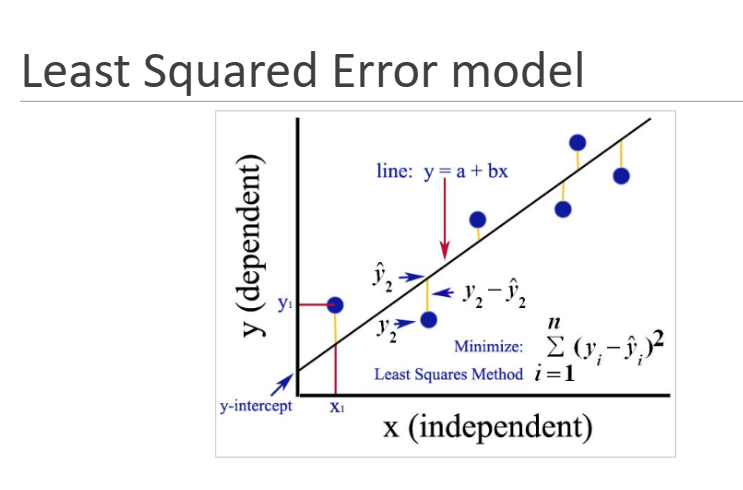

## Step1. Data Ingestion

In [40]:
from warnings import filterwarnings
filterwarnings("ignore")

In [41]:
path = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\50_Startups.csv"

In [42]:
import pandas as pd
st = pd.read_csv(path)

In [43]:
st.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## step2. Basic data quality checks

In [44]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [45]:
st.shape

(50, 5)

In [46]:
st.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

## Missing values

In [47]:
st.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [48]:
st.duplicated().sum()

0

## Step4  separate X and Y
X = Independent features
Y = dependent features

In [49]:
st.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [50]:
X = st[["RND","MKT"]]
Y = st[["PROFIT"]]

In [51]:
X.head()

,RND,MKT
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [52]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step5: Build a model

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [54]:
model.intercept_

array([46975.86422072])

In [55]:
model.coef_

array([[0.79658404, 0.02990788]])

## Equation of line = B0 +B1.X1 + B2.X2
PROFIT_PREDICTED = 46975.86 + 0.79*RND + 0.029*MKT
when RND and MKT are 0, profit_predicted = intercept
when RND increases by 1 and MKT increases by 1, ypredicted will always increased by 0.82

In [56]:
st["MKT"].min()

0.0

## Step 6: model predictions

In [57]:
ypred = model.predict(X)
ypred[:5]

array([[192800.45862502],
       [189774.65948019],
       [181405.37809703],
       [173441.30884249],
       [171127.62321762]])

In [59]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [58]:
model.score(X,Y)

0.9504503015559763

## Step7: Evaluation metrics
    Mean squared error
    Root Mean squared error
    Mean absolute error
    R2 Score- R squared - Coeff of determination

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
def evaluate(modelname):
    # calculate ypred data
    ypred = model.predict(X)

    # calculate MSE
    mse = mean_squared_error(Y,ypred)

    # calculate RMSE
    rmse = mse**(1/2)

    # calculate MAE
    mae = mean_absolute_error(Y,ypred)

    # calculate R2 score
    r2 = r2_score(Y,ypred)

    # print out all the values
    print(f"Mean squared error is {round(mse,2)}")
    print(f"Root Mean squared error is {round(rmse,2)}")
    print(f"Mean absolute error is {round(mae,2)}")
    print(f"R2 score is {round(r2*100,2)}%")

In [31]:
evaluate(model)

Mean squared error is 78887897.01
Root Mean squared error is 8881.89
Mean absolute error is 6499.32
R2 score is 95.05%


## Since model is providing an R2 score of more than 80%, we can consider this model for out of sample predictions

In [37]:
x = [150000,175000]

In [39]:
ypred1 = model.predict([x])
ypred1

array([[171697.34899013]])